<a href="https://colab.research.google.com/github/fatihtrkmen/pitchtypeprediction/blob/master/08_10_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import csv
import os
#sklearn
import sklearn
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
import numpy

from keras.optimizers import adam
#
from sklearn.preprocessing import LabelEncoder

from google.colab import files
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


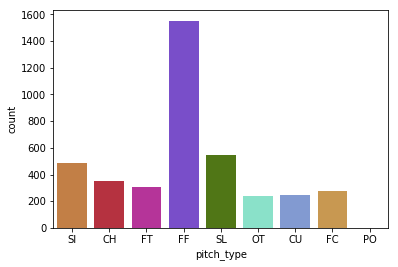

In [8]:
data1 = pd.read_csv("drive/My Drive/Colab Notebooks/Fatih_Thesis/dataset/historical_pitches_bats_pruned.csv")
data1 = data1.dropna(how='any')
data1 = data1.tail(4000)

for index, row in data1.iterrows():
    if row['pitch_type'] == "IN" or row['pitch_type'] == "KC" or row['pitch_type'] == "FO" or row['pitch_type'] == "EP" or row['pitch_type'] == "FS":
        data1.loc[index, 'pitch_type'] = "OT"



colors = ["#d77d31", "#cb1c2f",'#cb1ea5','#7339dd',"#538606", "#7cefcf",'#7595de','#dc9c3d',"#f74745", "#5dc2e3",'#27ead7','#8c8b95',"#9fbd5c", "#9d2c95",'#85fe12','#f8d370',"#4a3a4b", "#40c3f4",'#73bd6f','#e46f37']

#lb_make = LabelEncoder()
#lb_make.fit_transform
#data1["pitch_type"] = lb_make.fit_transform(data1["pitch_type"])
#lbl = lb_make.inverse_transform(2)

sns.countplot('pitch_type', data=data1,palette=colors)

In [0]:
data = pd.read_csv("drive/My Drive/Colab Notebooks/Fatih_Thesis/dataset/historical_pitches_bats_pruned.csv",index_col="ab_id")
data = data.dropna(how='any')
data = data.tail(2000)

for index, row in data.iterrows():
    if row['pitch_type'] == "IN" or row['pitch_type'] == "KC" or row['pitch_type'] == "FO" or row['pitch_type'] == "EP" or row['pitch_type'] == "FS":
        data.loc[index, 'pitch_type'] = "OT"


In [0]:
column_names = list(data.columns.values)
del column_names[column_names.index("pitch_type")]

In [0]:
lb_make = LabelEncoder()
target  = lb_make.fit_transform(list(data["pitch_type"]))

x_train, x_test, y_train, y_test = train_test_split(data[column_names], target, test_size=.25, random_state=1)

In [0]:
print(data["pitch_type"].shape)
print(data[column_names].shape)

print(target.shape)

(2000,)
(2000, 537)
(2000,)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


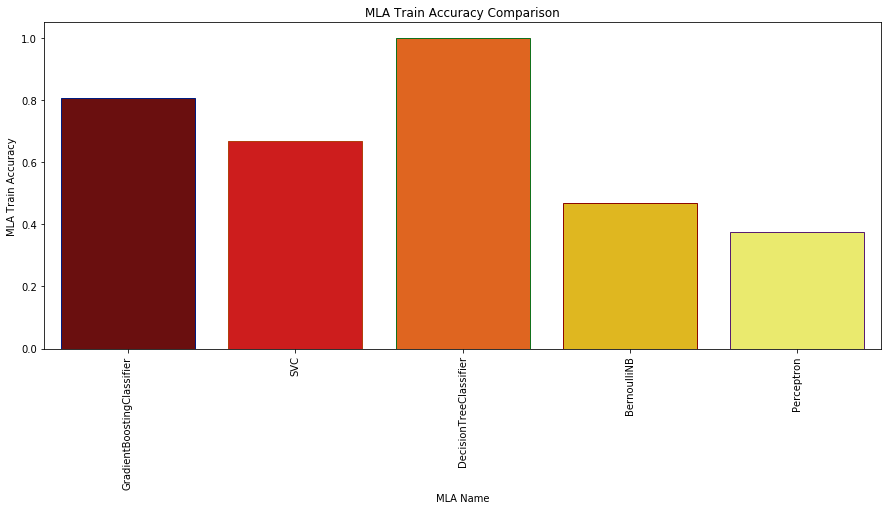

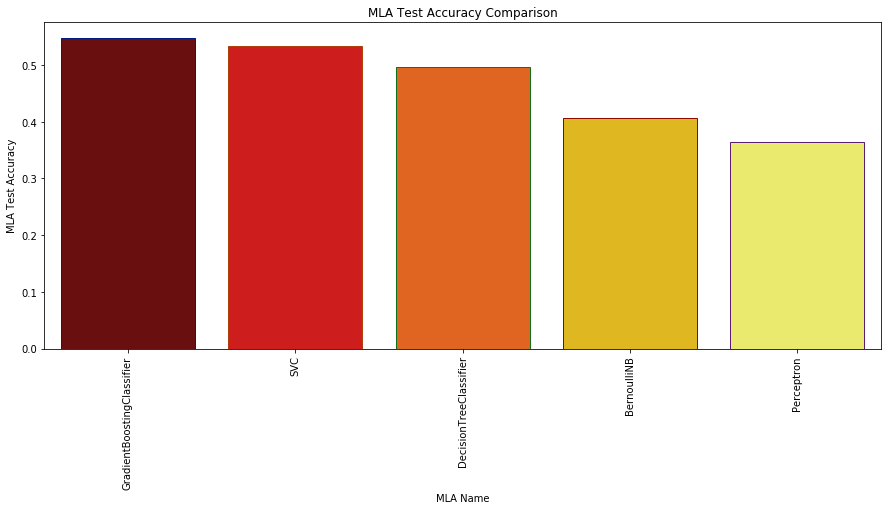

In [0]:
MLA = [
#     #Ensemble Methods
     #-ensemble.AdaBoostClassifier(),
     #-ensemble.BaggingClassifier(),
     #-ensemble.ExtraTreesClassifier(),
     ensemble.GradientBoostingClassifier(),
     #-ensemble.RandomForestClassifier(),

#     #Gaussian Processes
     #-gaussian_process.GaussianProcessClassifier(),
    
#     #GLM
     #-linear_model.LogisticRegressionCV(),
     #-linear_model.PassiveAggressiveClassifier(),
     #-linear_model. RidgeClassifierCV(),
     #-linear_model.SGDClassifier(),
     linear_model.Perceptron(),
    
#     #Navies Bayes
     naive_bayes.BernoulliNB(),
     #naive_bayes.GaussianNB(),
    
#     #Nearest Neighbor
     #-neighbors.KNeighborsClassifier(),
    
    #SVM
   svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
   #- svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(criterion="entropy"),
   #- tree.ExtraTreeClassifier(),
    
    ]
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

In [0]:
from keras.utils import to_categorical
categ_target = to_categorical(target)

seed = 7
numpy.random.seed(seed)
# create model
model = Sequential()
model.add(Dense(1024, input_dim=537 , init = "normal", activation= "tanh" ))
model.add(Dense(1024, init= "uniform" , activation= "tanh" ))
model.add(Dense(512, init= "uniform" , activation= "relu" ))
model.add(Dense(512, init= "uniform" , activation= "relu" ))
model.add(Dense(512, init= "uniform" , activation= "relu" ))
model.add(Dense(256, init= "uniform" , activation= "relu" ))
model.add(Dense(128, init= "uniform" , activation= "relu" ))
model.add(Dense(7, init= "uniform" , activation= "sigmoid" ))
# Compile model
optimizer = adam(lr = .000001, amsgrad = True, decay=.999)
model.compile(loss= "categorical_crossentropy" , optimizer= optimizer , metrics=[ "accuracy" ])
# Fit the model
model.fit(data[column_names], categ_target, nb_epoch=1500, batch_size=256)
# evaluate the model
scores = model.evaluate(input_d, categ_target)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, input_dim=537, activation="tanh", kernel_initializer="normal")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call

ValueError: ignored

In [0]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

column_names = list(data.columns.values)
del column_names[column_names.index("pitch_type")]

print(data["pitch_type"].value_counts())


lb_make = LabelEncoder()
target  = lb_make.fit_transform(data["pitch_type"])


smt = SMOTE()
X_train, y_train = smt.fit_sample(data[column_names], target)

print(y_train.value_counts())

FF    26195
SL    10920
FT     9257
CH     8128
SI     7805
CU     5014
FC     4760
KC     1666
FS     1349
KN      423
IN      397
EP       44
FO       26
PO       20
FA        3
SC        1
UN        1
Name: pitch_type, dtype: int64


ValueError: ignored

In [0]:
print(data.columns)

Index(['batter_id', 'pitcher_id', 'pitch_type', 'pitch_num', 'g_id', 'inning',
       'ZONE_1_SA', 'ZONE_1_FF_SA', 'ZONE_1_CU_SA', 'ZONE_1_FC_SA',
       ...
       'ZONE_14_KC_BA', 'ZONE_14_EP_BA', 'ZONE_14_FS_BA', 'ZONE_14_FO_BA',
       'ZONE_14_PO_BA', 'ZONE_14_KN_BA', 'ZONE_14_UN_BA', 'ZONE_14_SC_BA',
       'ZONE_14_FA_BA', 'ZONE_14_AB_BA'],
      dtype='object', length=538)


(5, 76009)


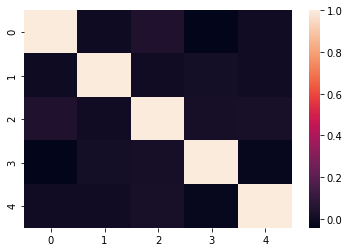

In [0]:
# Feature selection part computing 
# as an example I am going to analyse the correlation between spin rate and initial speed
# this can be done by computing correlation matrix

lb_make = LabelEncoder()
data["pitch_type"]  = lb_make.fit_transform(data["pitch_type"])

corr = data['pitch_type']
corr = np.vstack((corr, data['pitch_num']))
corr = np.vstack((corr, data['inning']))
corr = np.vstack((corr, data['pitcher_id']))
corr = np.vstack((corr, data['batter_id']))
len(corr)
crr = np.array(corr)
print(crr.shape)
#print(len(df['px']))
#print(len(df['pz']))

cdt1 = pd.DataFrame(crr.transpose(1,0))
sns.heatmap(cdt1.corr())

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pandas
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("drive/My Drive/Colab Notebooks/Fatih_Thesis/dataset/historical_pitches_bats_pruned.csv")
data = data.head(4000)
sns.set(style="white")

#Using Pearson Correlation
plt.figure(figsize=(6,5))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()